# Customer Engagement Analysis using E-commerce Dataset
This notebook performs data cleaning, exploratory data analysis, feature engineering, and predictive modeling on an e-commerce dataset.

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()



## Step 2: Load Dataset

In [18]:


# Step 2: Load Dataset
data = pd.read_csv('ecommerce_customer_data.csv')
print("Dataset Preview:")
print(data.head())


Dataset Preview:
   Customer ID        Purchase Date Product Category  Product Price  Quantity  \
0        44605  2023-05-03 21:30:02             Home            177         1   
1        44605  2021-05-16 13:57:44      Electronics            174         3   
2        44605  2020-07-13 06:16:57            Books            413         1   
3        44605  2023-01-17 13:14:36      Electronics            396         3   
4        44605  2021-05-01 11:29:27            Books            259         4   

   Total Purchase Amount Payment Method  Customer Age  Returns Customer Name  \
0                   2427         PayPal            31      1.0   John Rivera   
1                   2448         PayPal            31      1.0   John Rivera   
2                   2345    Credit Card            31      1.0   John Rivera   
3                    937           Cash            31      0.0   John Rivera   
4                   2598         PayPal            31      1.0   John Rivera   

   Age  Gender 

## Step 3: Data Cleaning

In [3]:
# Step 2: Data Cleaning
# Drop irrelevant columns
data = data.drop(['CustomerID', 'ProductID'], axis=1, errors='ignore')
data['PurchaseDate'] = pd.to_datetime(data['Purchase Date'], errors='coerce')  # Convert to datetime
data['PurchaseDate'] = data['PurchaseDate'].fillna(data['PurchaseDate'].mode()[0])  # Fill missing values


# Handle missing values in numeric columns
numeric_data = data.select_dtypes(include=[np.number])  # Select numeric columns
data[numeric_data.columns] = numeric_data.fillna(numeric_data.median())  # Fill numeric missing values with median

# Fill missing values in categorical columns
if 'Gender' in data.columns:
    data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)

if 'Product Category' in data.columns:
    data['Product Category'].fillna(data['Product Category'].mode()[0], inplace=True)

# Drop rows with missing 'Purchase Date'
if 'Purchase Date' in data.columns:
    data.dropna(subset=['Purchase Date'], inplace=True)

print("Data Cleaning Completed!")

Data Cleaning Completed!


## Step 4: Exploratory Data Analysis

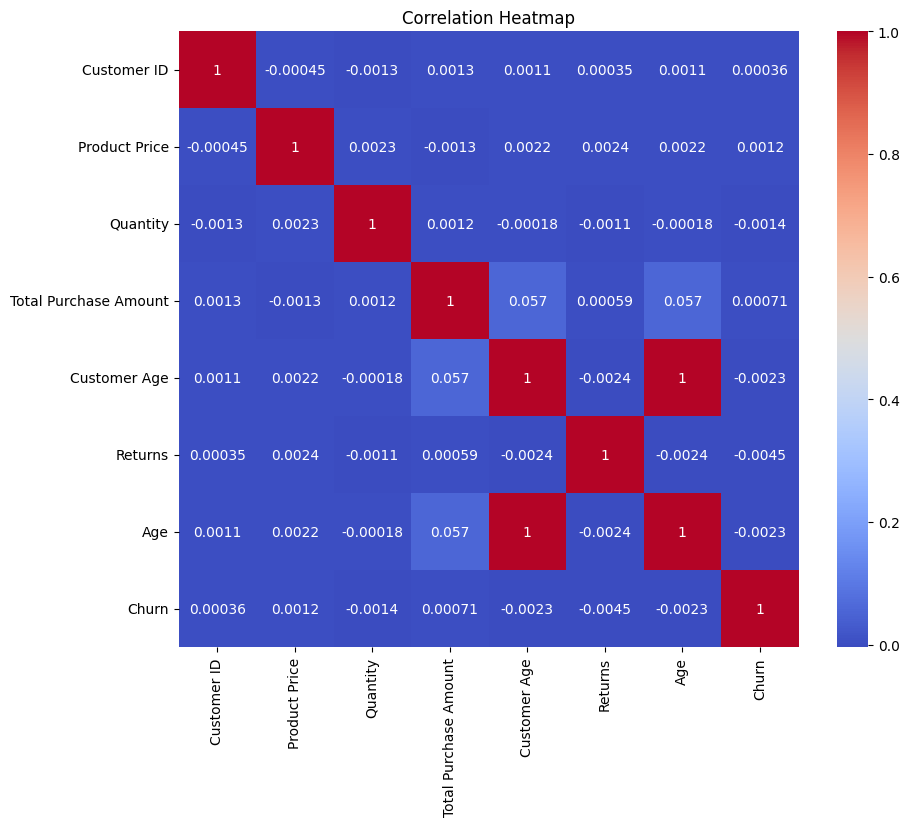

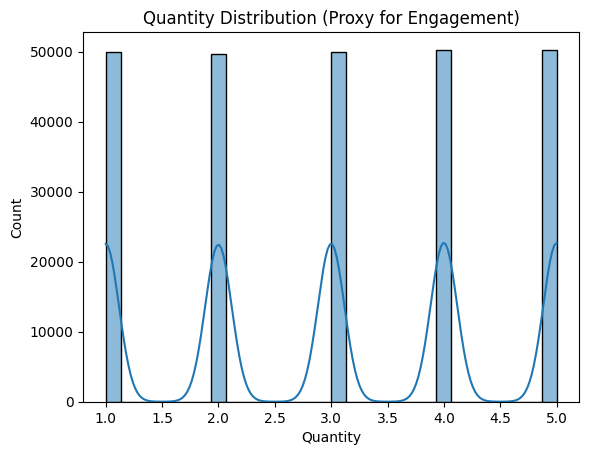

In [4]:
# Step 4: Exploratory Data Analysis
plt.figure(figsize=(10, 8))
sns.heatmap(data.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

sns.histplot(data['Quantity'], bins=30, kde=True)
plt.title('Quantity Distribution (Proxy for Engagement)')
plt.xlabel('Quantity')
plt.show()

## Step 5: Feature Engineering

In [5]:
# Step 5: Feature Engineering
data['EngagementScore'] = data['Quantity'] * data['Product Price']
data['HighEngagement'] = (data['EngagementScore'] > data['EngagementScore'].median()).astype(int)

data['PurchaseDate'] = pd.to_datetime(data['Purchase Date'])
data['DaysSinceLastPurchase'] = (data['PurchaseDate'].max() - data['PurchaseDate']).dt.days

# Prepare data for machine learning
X = data.drop(['HighEngagement', 'EngagementScore', 'Purchase Date'], axis=1)
y = data['HighEngagement']

# Scale numeric features
scaler = MinMaxScaler()
X_numeric = X.select_dtypes(include=[np.number])  # Select numeric columns
X[X_numeric.columns] = scaler.fit_transform(X_numeric)

print("Feature Engineering Completed!")


Feature Engineering Completed!


## Step 6: Split Data

In [14]:
# Step 6: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 7: Random Forest Classifier

In [15]:
# Step 7: Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)  # Train the model
y_pred_rf = rf_model.predict(X_test)  # Make predictions

# Print Random Forest Classification Report and Accuracy
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Feature Importance
importance_rf = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
importance_rf = importance_rf.sort_values(by='Importance', ascending=False)

# Plot feature importance
sns.barplot(x='Importance', y='Feature', data=importance_rf)
plt.title('Feature Importance')
plt.show()

ValueError: could not convert string to float: 'Electronics'

## Step 8: Save Results

In [16]:
# Step 8: Save Results
# Save the processed dataset to a CSV file
data.to_csv('processed_ecommerce_data.csv', index=False)

# Save the Random Forest model summary to a text file
with open('rf_model_summary.txt', 'w') as f:
    f.write("Random Forest Accuracy: {:.2f}\n".format(accuracy_score(y_test, y_pred_rf)))
    f.write("\nFeature Importances:\n")
    f.write(importance_rf.to_string(index=False))

print("\nAnalysis Complete! Results saved to disk.")

NameError: name 'y_pred_rf' is not defined

### Additional Data Exploration

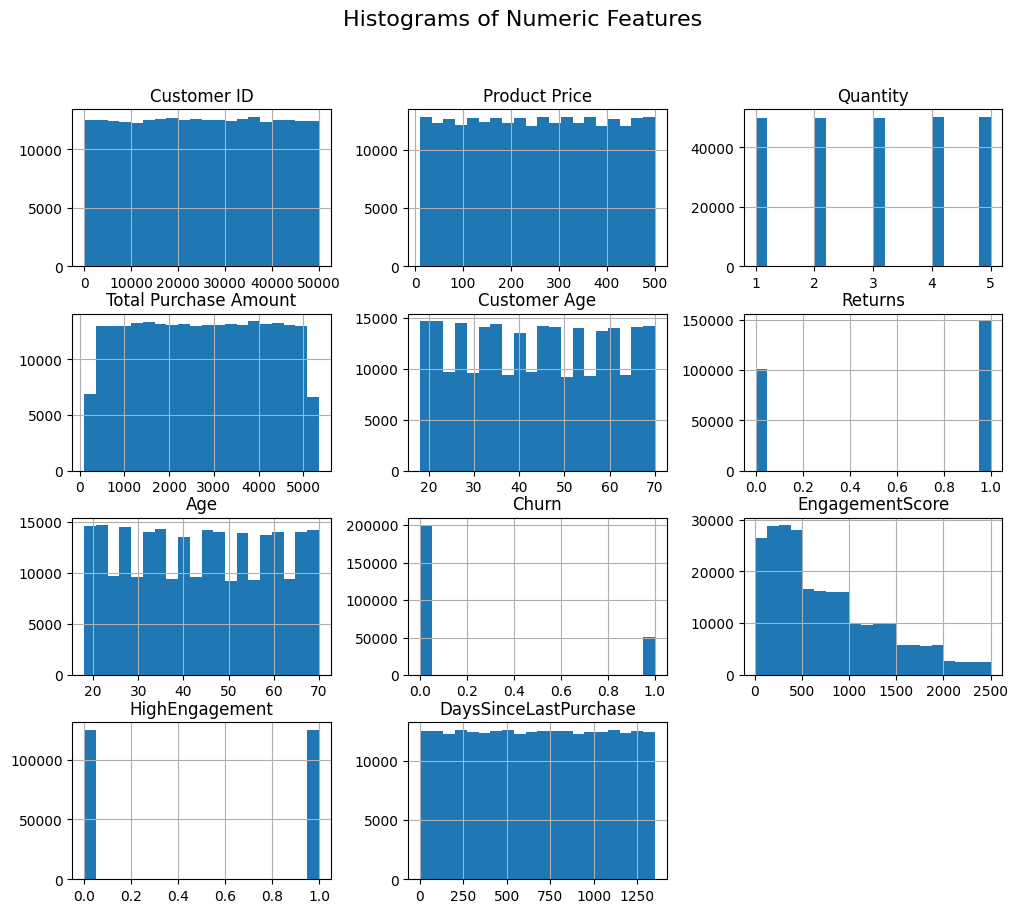

In [ ]:
# Step 4: Additional Exploratory Data Analysis

# Distribution of numerical features
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols].hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Numeric Features', fontsize=16)
plt.show()

# Count plots for categorical features
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


### Model Development and Insights

In [17]:
# Step 7: Model Insights

# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low Engagement', 'High Engagement'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Insights based on Feature Importance
print("Top Features Contributing to Engagement:")
print(importance_rf.head(5))

NameError: name 'y_pred_rf' is not defined